In [6]:
from sklearn.datasets import load_diabetes
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data =load_diabetes(return_X_y=False)


In [8]:
X = data.data
y = data.target

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42) 



In [10]:

from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()


In [11]:
#Búsqueda por rejilla
from sklearn.model_selection import GridSearchCV

rejilla = {'criterion':['squared_error','friedman_mse','absolute_error','poisson'], 'max_depth':[3,5,7,9], 'min_samples_split':[2,4,8]}

modeloGridSearchCrossValidation = GridSearchCV(estimator=modelo,param_grid=rejilla,scoring='neg_mean_absolute_error',cv=5)

modeloGridSearchCrossValidation.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_split': [2, 4, 8]},
             scoring='neg_mean_absolute_error')

In [12]:
#Best score:
modeloGridSearchCrossValidation.best_score_

np.float64(-52.14431015551388)

In [13]:
mejorModelo = modeloGridSearchCrossValidation.best_estimator_
mejorModelo.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      min_samples_split=8)

In [14]:
y_pred = mejorModelo.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error 
mean_absolute_error(y_pred,y_test)

48.0965923002249

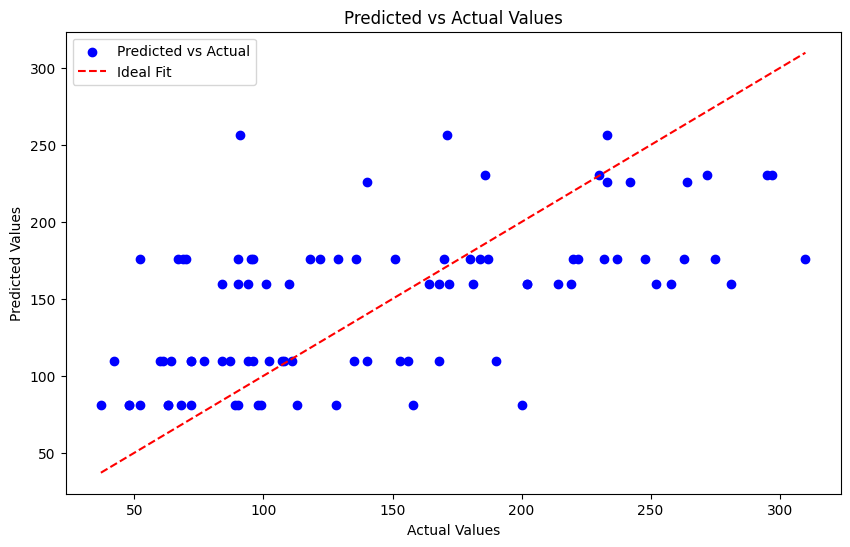

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()